In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

# The dataset is from https://archive.ics.uci.edu/ml/datasets/Balance+Scale

#

In [2]:
d = pd.read_csv('balance-scale.data', header=None, names=['C','LW','LD','RW','RD'])
d

#

,C,LW,LD,RW,RD
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


Looks like total number of examples is here.



In [3]:
d.describe()

#

,LW,LD,RW,RD
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [4]:
d.C.describe()
#

count     625
unique      3
top         R
freq      288
Name: C, dtype: object

It looks like there's no discrepencies with values
(i.e. all values seem to be in range of 1 to 5 inclusive).

Let's draw some graphs.



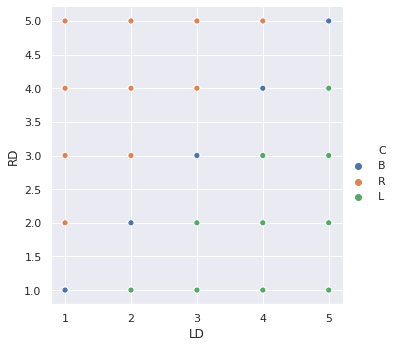

In [5]:
sns.relplot(x="LD", y="RD", hue="C", data=d)
# plt.savefig('distance.png')


#

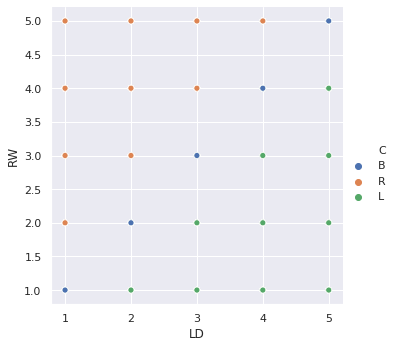

In [6]:
sns.relplot(x="LD", y="RW", hue="C", data=d)
# plt.savefig('left_distance_right_weight.png')


#

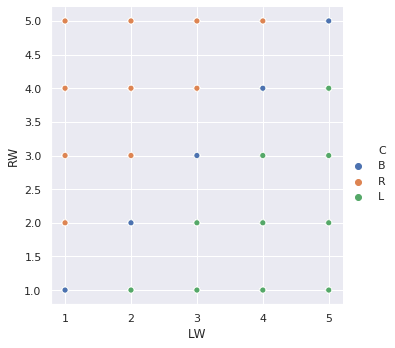

In [7]:
sns.relplot(x="LW", y="RW", hue="C", data=d)
# plt.savefig('weight.png')

#

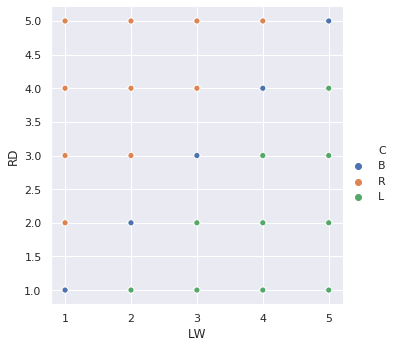

In [8]:
sns.relplot(x="LW", y="RD", hue="C", data=d)
# plt.savefig('left_weight_right_distance.png')

#

By looking at these graphs, it looks like values are proportianally distributed
whether it's against the same attributes or not.

Will need to do two things:
1. Need to run some models to see that the proportionality of the height and weight will make a very accurate model.
2. Need to find a way to show percentages of classes for each intersecting point (no point -- the classes do not have duplicate samples. Thus no noise.)
to see whether there could be noise for the classes.




After running some models and concluding results about their accuricies. I wondered what kind of data I am dealing with.



In [9]:
d[d.C == 'B'].describe()
#

,LW,LD,RW,RD
count,49.000000,49.000000,49.000000,49.000000
mean,2.938776,2.938776,2.938776,2.938776
std,1.420214,1.420214,1.420214,1.420214
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [10]:
samples = d[d.C == 'B'].loc[:, ['LW', 'RW', 'LD', 'RD']].to_numpy()
s = set([tuple(array) for array in samples])
print('Sum of items:', len(s))
# Looks like there are unique values for the Balanced class

#

Sum of items: 49


In [11]:
d[d.C == 'L'].describe()

#

,LW,LD,RW,RD
count,288.000000,288.000000,288.000000,288.000000
mean,3.611111,3.611111,2.399306,2.399306
std,1.227508,1.227508,1.331840,1.331840
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,1.000000,1.000000
50%,4.000000,4.000000,2.000000,2.000000
75%,5.000000,5.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000


In [12]:
samples = d[d.C == 'L'].loc[:, ['LW', 'RW', 'LD', 'RD']].to_numpy()
s = set([tuple(array) for array in samples])
print('Sum of items:', len(s))
# Looks like there are unique values for the Left class.

#

Sum of items: 288


In [13]:
d[d.C == 'R'].describe()

#

,LW,LD,RW,RD
count,288.000000,288.000000,288.000000,288.000000
mean,2.399306,2.399306,3.611111,3.611111
std,1.331840,1.331840,1.227508,1.227508
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,3.000000
50%,2.000000,2.000000,4.000000,4.000000
75%,3.000000,3.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


In [14]:
samples = d[d.C == 'R'].loc[:, ['LW', 'RW', 'LD', 'RD']].to_numpy()
s = set([tuple(array) for array in samples])
print('Sum of items:', len(s))
# Looks like there are unique values for the Right class.

#

Sum of items: 288


In [15]:
# Let's see whether different classes share the same samples
samples = d[d.C == 'B'].loc[:, ['LW', 'RW', 'LD', 'RD']].to_numpy()
B_SET = set([tuple(array) for array in samples])

samples = d[d.C == 'L'].loc[:, ['LW', 'RW', 'LD', 'RD']].to_numpy()
L_SET = set([tuple(array) for array in samples])

samples = d[d.C == 'R'].loc[:, ['LW', 'RW', 'LD', 'RD']].to_numpy()
R_SET = set([tuple(array) for array in samples])

#

In [16]:
# Intersection between left and right class
print(len(L_SET & R_SET))

#

0


In [17]:
# Intersection between left and balanced class
print(len(L_SET & B_SET))

#

0


In [18]:
# Intersection between balanced and right class
print(len(B_SET & R_SET))

#

0


In [19]:
# In the end, I think I could have just done this:
d.duplicated(subset=['LW', 'RW', 'LD', 'RD']).describe()
# The unique value is one, the top value is false and it has all the entries. Thus, no duplicates.

#

count       625
unique        1
top       False
freq        625
dtype: object

After performing certain checks, I have the following thoughts:
- The dataset doesn't have any noise since there are no duplicate samples that classes share with each other.
- The range of values that exist for the balanced class indicates that the dataset represents multiple scales rather than one.

The last point really make sense to me after rereading the dataset description.

The description said that the dataset was generated to 'model psychological experiments' and there is a simple logic algorithm to determine which class of the balance is
based on readings of weight and distance for each side.

It means that the nature of dataset was to test algorithm's ability to train a model that would 'understand' or 'perceive' the logic for concluding classes correctly.

It really explains why neural networks had the accuracy of 97% with low standard deviation since they learnt on mistakes and generalise the logic problem compared to
other models.



In [20]:
#     ______                  __  _                ___
#    /  _/ /____  _________ _/ /_(_)___  ____     |__ \
#    / // __/ _ \/ ___/ __ `/ __/ / __ \/ __ \    __/ /
#  _/ // /_/  __/ /  / /_/ / /_/ / /_/ / / / /   / __/
# /___/\__/\___/_/   \__,_/\__/_/\____/_/ /_/   /____/
#

#

After learning about the decision tree algorithms, I will try to engineer features that can help the algorithm to work better.

The following comes to mind:
1. Make two features to represent calculations for each side.
2. Make three features to represent boolean values of left, right or balanced calculations. (i.e. make it look like a binary pattern like 1,0,0 for tipping to the left)
3. Make a balanced dataset (i.e. Make an equal amount of examples for right and left classes since there are way more of them rather than balanced one).
    1. Split it with all examples of the balanced class.
    2. Split it with half examples of the balanced class.
    3. Split it with one examples of the balanced class.